In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import xarray as xr
from tqdm import tqdm_notebook as tqdm
# from numba import jit, njit, jitclass
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [50]:
class L96OneLevel(object):
    def __init__(self, K=36, J=10, h=1, F=10, c=10, b=10, dt=0.01, 
                 X_init=None, no_prog=False):
        self.K, self.J, self.h, self.F, self.c, self.b, self.dt = K, J, h, F, c, b, dt
        self.params = [self.F]
        self.no_prog = no_prog
        self.X = np.random.rand(self.K) if X_init is None else X_init.copy()
        self.Y = np.zeros((self.K, self.J))
        self._history_X = [self.X.copy()]
        
    def _rhs(self, X):
        """Compute the right hand side of the ODE."""
        dXdt = (
            -np.roll(X, -1) * (np.roll(X, -2) - np.roll(X, 1)) - 
            X + self.F
        )       
        return dXdt
    
    def step(self):
        """Step forward one time step with RK4."""
        k1 = self.dt * self._rhs(self.X)
        k2 = self.dt * self._rhs(self.X + k1/2)
        k3 = self.dt * self._rhs(self.X + k2/2)
        k4 = self.dt * self._rhs(self.X + k3)
        self.X += 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        self._history_X.append(self.X.copy())
        
    def iterate(self, steps):
        for n in tqdm(range(steps), disable=self.no_prog):
            self.step()
    
    @property
    def history(self):
        return xr.DataArray(self._history_X, dims=['time', 'x'], name='X')

In [51]:
# Just to create some initial conditions
l96 = L96OneLevel()

In [52]:
l96.iterate(1000)

In [53]:
init = l96.X.copy()

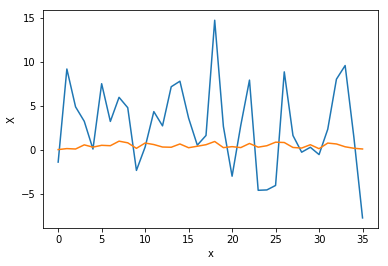

In [54]:
l96.history[-1].plot()
l96.history[0].plot()

## DA cycling

In [55]:
n_ens = 20
x_t = init
x_a = x_t + np.random.normal(0, 1, x_t.shape)
x_a_ens = np.array([x_a]*n_ens)
x_a_ens += np.random.normal(0, 1, x_a_ens.shape)

In [56]:
l96_truth = L96OneLevel(X_init=init.copy(), no_prog=True)
l96_det = L96OneLevel(X_init=x_a, no_prog=True)
l96_ens = []
for i in range(n_ens):
    l96_ens.append(L96OneLevel(X_init=x_a_ens[i], no_prog=True))

In [57]:
n_cycles = 10
n_dt = 50 #int(5 / l96.dt)
sig_obs = 1
R = np.diag(np.ones(36) * sig_obs)   # No localization
for icyc in tqdm(range(n_cycles)):
    # Forecast
    l96_det.iterate(n_dt)
    for le in l96_ens:
        le.iterate(n_dt)
    l96_truth.iterate(n_dt)
    
    # Get arrays
    x_f = l96_det.X
    x_f_ens = np.array([le.X for le in l96_ens])
    y = l96_truth.X + np.random.normal(0, sig_obs, l96_truth.X.shape)
    y_ens = np.array([y + np.random.normal(0, sig_obs, y.shape) 
                      for i in range(n_ens)])
    
    # Do the math
    X = (x_f_ens - x_f_ens.mean(0)).T
    Y = X
    K = X @ Y.T @ inv(Y @ Y.T + (n_ens -1)*R)
    x_a = x_f + K @ (y - x_f)
    x_a_ens = np.array([
        x_f_ens[i] + K @ (y_ens[i] - x_f_ens[i]) for i in range(n_ens)
    ])
    
    # Set the new arrays
    l96_det.X = x_a
    for i, le in enumerate(l96_ens):
        le.X = x_a_ens[i]
    

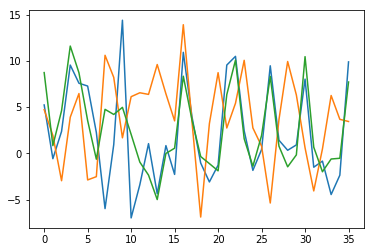

In [58]:
plt.plot(x_f)
plt.plot(y)
plt.plot(x_a)

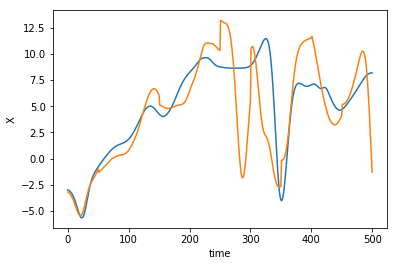

In [59]:
l96_truth.history[:, 20].plot()
l96_det.history[:, 20].plot()

## Localization

In [60]:
GC = np.zeros((36, 36))

In [61]:
from scipy.stats import norm

In [62]:
gauss = norm(0, 2)

In [63]:
scale = gauss.pdf(0)

In [64]:
for i in range(36):
    for j in range(36):
        diff = i-j
        GC[i, j] = gauss.pdf(diff) / scale

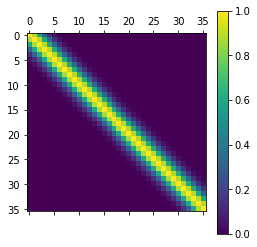

In [65]:
plt.matshow(GC); plt.colorbar()

In [66]:
n_ens = 20
x_t = init
x_a = x_t + np.random.normal(0, 1, x_t.shape)
x_a_ens = np.array([x_a]*n_ens)
x_a_ens += np.random.normal(0, 1, x_a_ens.shape)

In [67]:
l96_truth = L96OneLevel(X_init=init.copy(), no_prog=True)
l96_det = L96OneLevel(X_init=x_a, no_prog=True)
l96_ens = []
for i in range(n_ens):
    l96_ens.append(L96OneLevel(X_init=x_a_ens[i], no_prog=True))

In [68]:
n_cycles = 10
n_dt = 100 #int(5 / l96.dt)
sig_obs = 1
R = np.diag(np.ones(36) * sig_obs)   # No localization
for icyc in tqdm(range(n_cycles)):
    # Forecast
    l96_det.iterate(n_dt)
    for le in l96_ens:
        le.iterate(n_dt)
    l96_truth.iterate(n_dt)
    
    # Get arrays
    x_f = l96_det.X
    x_f_ens = np.array([le.X for le in l96_ens])
    y = l96_truth.X + np.random.normal(0, sig_obs, l96_truth.X.shape)
    y_ens = np.array([y + np.random.normal(0, sig_obs, y.shape) 
                      for i in range(n_ens)])
    
    # Do the math
    X = (x_f_ens - x_f_ens.mean(0)).T
    Y = X
    obs_cov = Y @ Y.T * GC
    K = X @ Y.T @ inv(obs_cov  + (n_ens -1)*R)
    x_a = x_f + K @ (y - x_f)
    x_a_ens = np.array([
        x_f_ens[i] + K @ (y_ens[i] - x_f_ens[i]) for i in range(n_ens)
    ])
    
    # Set the new arrays
    l96_det.X = x_a
    for i, le in enumerate(l96_ens):
        le.X = x_a_ens[i]
    

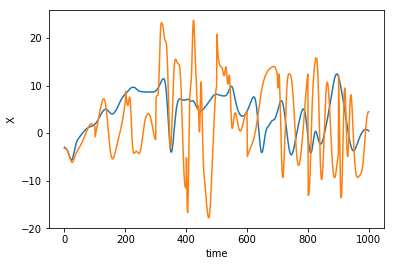

In [69]:
l96_truth.history[:, 20].plot()
l96_det.history[:, 20].plot()

## Parameter estimation

In [210]:
n_ens = 100
x_t = init
x_a = x_t + np.random.normal(0, 1, x_t.shape)
x_a_ens = np.array([x_a]*n_ens)
x_a_ens += np.random.normal(0, 1, x_a_ens.shape)

In [211]:
F_prior = 15
F_sigma = 5

In [212]:
l96_truth = L96OneLevel(X_init=init.copy(), no_prog=True)
l96_det = L96OneLevel(X_init=x_a, no_prog=True, F=F_prior)
l96_ens = []
for i in range(n_ens):
    l96_ens.append(L96OneLevel(X_init=x_a_ens[i], no_prog=True, F=F_prior + np.random.normal(0, F_sigma)))

In [213]:
def h(x): return x[:36]

In [214]:
n_cycles = 20
n_dt = 100 #int(5 / l96.dt)
sig_obs = 1
R = np.diag(np.ones(36) * sig_obs)   # No localization
F_det_hist = [l96_det.F]
F_ens_hist = [[le.F for le in l96_ens]]
for icyc in tqdm(range(n_cycles)):
    # Forecast
    l96_det.iterate(n_dt)
    for le in l96_ens:
        le.iterate(n_dt)
    l96_truth.iterate(n_dt)
    
    # Get arrays
    x_f = np.concatenate([l96_det.X, np.atleast_1d(l96_det.F)])
    x_f_ens = np.array([np.concatenate([le.X, np.atleast_1d(le.F)]) for le in l96_ens])
    y = l96_truth.X + np.random.normal(0, sig_obs, l96_truth.X.shape)
    y_ens = np.array([y + np.random.normal(0, sig_obs, y.shape) 
                      for i in range(n_ens)])
    
    # Do the math
    X = (x_f_ens - x_f_ens.mean(0)).T
    Y = h(X)
    obs_cov = Y @ Y.T# * GC
    K = X @ Y.T @ inv(obs_cov  + (n_ens -1)*R)
    x_a = x_f + K @ (y - h(x_f))
    x_a_ens = np.array([
        x_f_ens[i] + K @ (y_ens[i] - h(x_f_ens[i])) for i in range(n_ens)
    ])
    
    # Set the new arrays
    l96_det.X = x_a[:36]
    l96_det.F = x_a[36]

    for i, le in enumerate(l96_ens):
        le.X = x_a_ens[i][:36]
        le.F = x_a_ens[i][36]
    
    F_det_hist.append(l96_det.F)
    F_ens_hist.append([le.F for le in l96_ens])

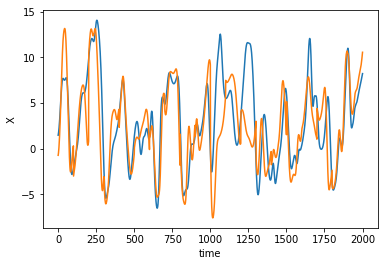

In [215]:
l96_truth.history[:, 20].plot()
l96_det.history[:, 20].plot()

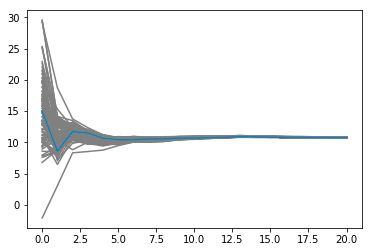

In [216]:
plt.plot(F_det_hist)
F_ens_hist = np.array(F_ens_hist)
for i in range(n_ens):
    plt.plot(F_ens_hist[:, i], c='gray')
    plt.plot(F_det_hist)

In [217]:
F_det_hist[-1]

10.717930500461962

### Inflate ens

In [6]:
n_ens = 100
x_t = init
x_a = x_t + np.random.normal(0, 1, x_t.shape)
x_a_ens = np.array([x_a]*n_ens)
x_a_ens += np.random.normal(0, 1, x_a_ens.shape)

In [7]:
F_prior = 15
F_sigma = 5

In [8]:
l96_truth = L96OneLevel(X_init=init.copy(), no_prog=True)
l96_det = L96OneLevel(X_init=x_a, no_prog=True, F=F_prior)
l96_ens = []
for i in range(n_ens):
    l96_ens.append(L96OneLevel(X_init=x_a_ens[i], no_prog=True, F=F_prior + np.random.normal(0, F_sigma)))

In [229]:
def h(x): return x[:36]

In [230]:
n_cycles = 20
n_dt = 100 #int(5 / l96.dt)
sig_obs = 1
R = np.diag(np.ones(36) * sig_obs)   # No localization
F_det_hist = [l96_det.F]
F_ens_hist = [[le.F for le in l96_ens]]
for icyc in tqdm(range(n_cycles)):
    # Forecast
    l96_det.iterate(n_dt)
    for le in l96_ens:
        le.iterate(n_dt)
    l96_truth.iterate(n_dt)
    
    # Get arrays
    x_f = np.concatenate([l96_det.X, np.atleast_1d(l96_det.F)])
    x_f_ens = np.array([np.concatenate([le.X, np.atleast_1d(le.F)]) for le in l96_ens])
    y = l96_truth.X + np.random.normal(0, sig_obs, l96_truth.X.shape)
    y_ens = np.array([y + np.random.normal(0, sig_obs, y.shape) 
                      for i in range(n_ens)])
    
    # Do the math
    X = (x_f_ens - x_f_ens.mean(0)).T
    Y = h(X)
    obs_cov = Y @ Y.T# * GC
    K = X @ Y.T @ inv(obs_cov  + (n_ens -1)*R)
    x_a = x_f + K @ (y - h(x_f))
    x_a_ens = np.array([
        x_f_ens[i] + K @ (y_ens[i] - h(x_f_ens[i])) for i in range(n_ens)
    ])
    
    # Set the new arrays
    l96_det.X = x_a[:36]
    l96_det.F = x_a[36]

    for i, le in enumerate(l96_ens):
        le.X = x_a_ens[i][:36]
        le.F = x_a_ens[i][36] + np.random.normal(0, 0.5)
    
    F_det_hist.append(l96_det.F)
    F_ens_hist.append([le.F for le in l96_ens])

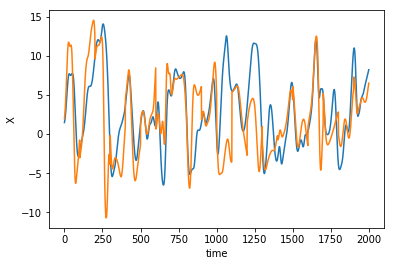

In [231]:
l96_truth.history[:, 20].plot()
l96_det.history[:, 20].plot()

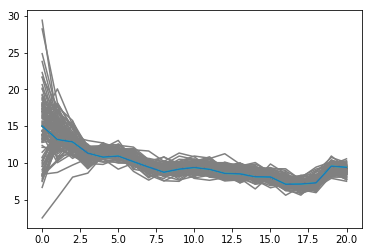

In [232]:
plt.plot(F_det_hist)
F_ens_hist = np.array(F_ens_hist)
for i in range(n_ens):
    plt.plot(F_ens_hist[:, i], c='gray')
    plt.plot(F_det_hist)

In [233]:
F_det_hist[-1]

9.396828065687103

## Learn in a climate setup

### How long do I have to integrate for decent statistics?

In [237]:
l96 = L96OneLevel(X_init=init.copy())

In [238]:
l96.iterate(100_000)

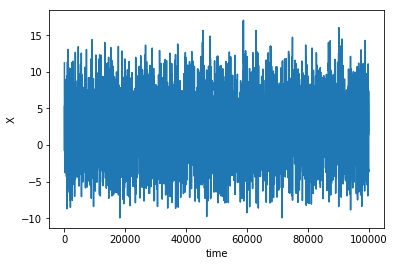

In [239]:
l96.history[:,0].plot()

In [240]:
l96.history.std()

<xarray.DataArray 'X' ()>
array(4.371376)

In [241]:
l96.history.mean()

<xarray.DataArray 'X' ()>
array(2.573185)

In [249]:
means = []
stds = []
nt=10000
for i in tqdm(range(100_000 // nt)):
    means.append(l96.history[i*nt:(i+1)*nt].mean())
    stds.append(l96.history[i*nt:(i+1)*nt].std())

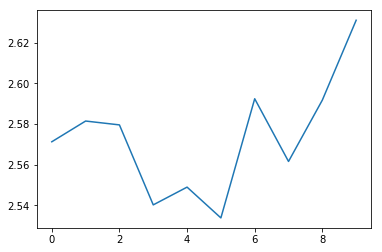

In [250]:
plt.plot(means)

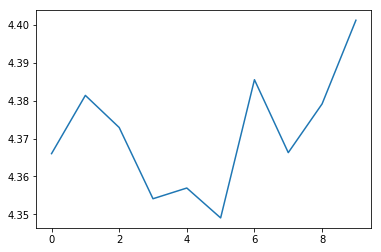

In [251]:
plt.plot(stds)

### Now do it

In [42]:
n_ens = 200
x_t = init
x_a = x_t + np.random.normal(0, 1, x_t.shape)
x_a_ens = np.array([x_a]*n_ens)
x_a_ens += np.random.normal(0, 1, x_a_ens.shape)

In [43]:
F_prior = 15
F_sigma = 5

In [44]:
l96_truth = L96OneLevel(X_init=init.copy(), no_prog=True)
l96_det = L96OneLevel(X_init=x_a, no_prog=True, F=F_prior)
l96_ens = []
for i in range(n_ens):
    l96_ens.append(L96OneLevel(X_init=x_a_ens[i], no_prog=True, F=F_prior + np.random.normal(0, F_sigma)))

In [45]:
import multiprocessing as mp

In [46]:
def multi_helper(l, nt):
    l.iterate(nt)
    return l

In [47]:
n_proc = 15
n_cycles = 20
n_dt = 1000 #int(5 / l96.dt)
sig_obs = 1
R = np.diag(np.ones(1) * sig_obs)   # No localization
F_det_hist = [l96_det.F]
F_ens_hist = [[le.F for le in l96_ens]]
for icyc in tqdm(range(n_cycles)):
    # Forecast
    all_ls = [l96_truth, l96_det] + l96_ens
    pool = mp.Pool(processes=n_proc)
    results = [pool.apply_async(multi_helper, args=(l, n_dt)) for l in all_ls]
    all_ls = [p.get() for p in results]
    pool.close()
    l96_truth = all_ls[0]
    l96_det = all_ls[1]
    l96_ens = all_ls[2:]


    
    # Get arrays
    x_f = np.array(l96_det.F)   # n_x
    x_f_ens = np.array([np.array(le.F) for le in l96_ens])   # n_ens x n_x
    
    # Continue here, also implement X**2.mean()
    y = np.array([
        l96_truth.history[-n_dt:].mean().values + np.random.normal(0, sig_obs),
        l96_truth.history[-n_dt:].std().values + np.random.normal(0, sig_obs),
    ])    # n_obs
    y_ens = np.array([y + np.random.normal(0, sig_obs, y.shape) 
                      for i in range(n_ens)])   # n_ens x n_obs
    h_det = np.array([
        l96_det.history[-n_dt:].mean().values,
        l96_det.history[-n_dt:].std().values
    ])   # n_obs
    h_ens = np.array([np.array([
        le.history[-n_dt:].mean().values,
        le.history[-n_dt:].std().values
    ]) for le in l96_ens])   # n_ens x n_obs
    
    # Do the math
    X = (x_f_ens - x_f_ens.mean(0)).T[None]   # n_x x n_ens
    Y = (h_ens - h_ens.mean(0)).T       # n_obs x n_ens
    obs_cov = Y @ Y.T# * GC                   # n_obs x n_obs
    K = X @ Y.T @ inv(obs_cov  + (n_ens -1)*R)
    x_a = x_f + K @ (y - h_det)
    x_a_ens = np.array([
        x_f_ens[i] + K @ (y_ens[i] - h_ens[i]) for i in range(n_ens)
    ])
    
    # Set the new arrays
    l96_det.F = np.squeeze(x_a)

    for i, le in enumerate(l96_ens):
        le.F = np.squeeze(x_a_ens[i]) + np.random.normal(0, 0.5)
    
    F_det_hist.append(l96_det.F)
    F_ens_hist.append([le.F for le in l96_ens])

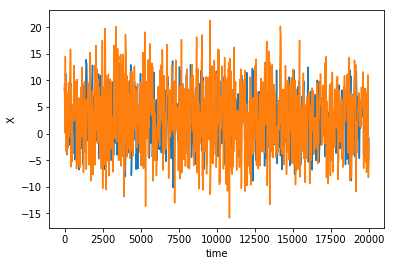

In [30]:
l96_truth.history[:, 20].plot()
l96_det.history[:, 20].plot()

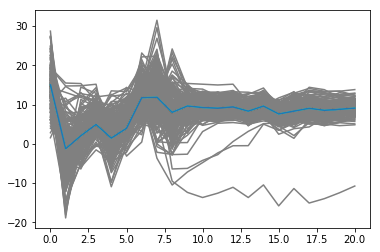

In [48]:
plt.plot(F_det_hist)
F_ens_hist = np.array(F_ens_hist)
for i in range(n_ens):
    plt.plot(F_ens_hist[:, i], c='gray')
    plt.plot(F_det_hist)

In [49]:
F_det_hist[-1]

array(9.09663585)